A1 Linear Regression with one feature:
Training MSE: 0.45079142310981746
Training RMSE: 0.6714100260718613
Training MAPE: 9.623078609620269e+16
Training R²: 0.006475219631192908
Test MSE: 0.5321365410699977
Test RMSE: 0.7294768955011514
Test MAPE: 1.418308185423407e+17
Test R²: 0.005707300341029287
Training Metrics:
MSE: 0.45079142310981746
RMSE: 0.6714100260718613
MAPE: 9.623078609620269e+16
R²: 0.006475219631192908
Testing Metrics:
MSE: 0.5321365410699977
RMSE: 0.7294768955011514
MAPE: 1.418308185423407e+17
R²: 0.005707300341029287


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score: 0.19927828332343958
Calinski-Harabasz Score: 108.60633773949695
Davies-Bouldin Score: 1.7183704098357429


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

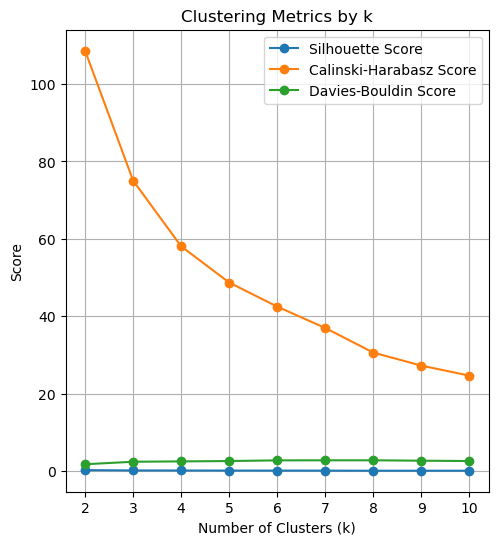

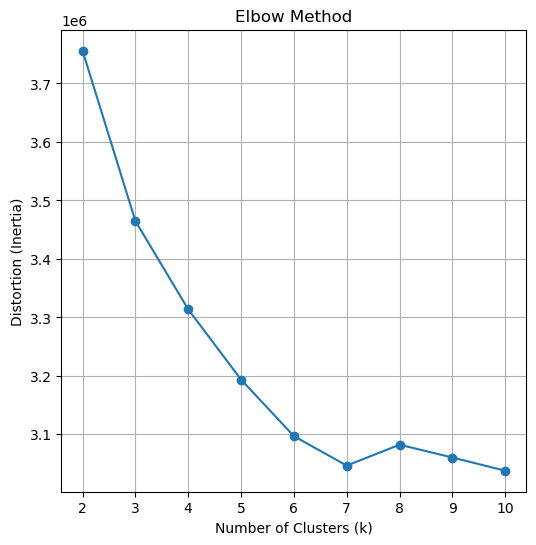

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

data = pd.read_csv(r'image_data3.csv')

X = data.drop('label', axis=1)
y = data['label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train[:, [0]], y_train)
y_train_pred = reg.predict(X_train[:, [0]])
y_test_pred = reg.predict(X_test[:, [0]])

print("A1 Linear Regression with one feature:")
print(f'Training MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'Training RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}')
print(f'Training MAPE: {mean_absolute_percentage_error(y_train, y_train_pred) * 100}')
print(f'Training R²: {r2_score(y_train, y_train_pred)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred)}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, y_test_pred) * 100}')
print(f'Test R²: {r2_score(y_test, y_test_pred)}')


reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_train_pred_all = reg_all.predict(X_train)
y_test_pred_all = reg_all.predict(X_test)


print(f"Training Metrics:\n"
      f"MSE: {mean_squared_error(y_train, y_train_pred)}\n"
      f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}\n"
      f"MAPE: {mean_absolute_percentage_error(y_train, y_train_pred) * 100}\n"
      f"R²: {r2_score(y_train, y_train_pred)}")

print(f"Testing Metrics:\n"
      f"MSE: {mean_squared_error(y_test, y_test_pred)}\n"
      f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}\n"
      f"MAPE: {mean_absolute_percentage_error(y_test, y_test_pred) * 100}\n"
      f"R²: {r2_score(y_test, y_test_pred)}")


kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
kmeans.fit(X_scaled)
labels = kmeans.labels_
centers = kmeans.cluster_centers_


print(f'Silhouette Score: {silhouette_score(X_scaled, labels)}\n'
      f'Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, labels)}\n'
      f'Davies-Bouldin Score: {davies_bouldin_score(X_scaled, labels)}')

k_range = range(2, 11)
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
distortions = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_scaled, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, labels))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(k_range, calinski_harabasz_scores, marker='o', label='Calinski-Harabasz Score')
plt.plot(k_range, davies_bouldin_scores, marker='o', label='Davies-Bouldin Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.legend()
plt.title('Clustering Metrics by k')
plt.grid()



plt.figure(figsize=(6, 6))
plt.plot(k_range, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method')
plt.grid()
plt.show()